In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_1 = 'orders.csv'
dataframe_1 = pd.read_csv(path_1)
path_2 = 'people.csv'
dataframe_2 = pd.read_csv(path_2)
path_3 = 'returns.csv'
dataframe_3 = pd.read_csv(path_3)
dataframe_1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,random
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,39
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,39


In [3]:
dataframe_1['Year']=''
dataframe_1['Year'] = dataframe_1['Order Date'].str[6:10]
dataframe_1['Year and Mouth']=''
dataframe_1['Year and Mouth']=dataframe_1['Year']+dataframe_1['Order Date'].str[2:5]
dataframe_1.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,random,Year,Year and Mouth
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,2017,2017/11
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,2017,2017/11
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,39,2017,2017/06
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9,2016,2016/10
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,39,2016,2016/10


In [4]:
sp=dataframe_1.groupby(['Year','Category'],sort=True).sum()['Profit']
sp

Year  Category       
2015  Furniture           5183.9123
      Office Supplies    21666.1148
      Technology         21025.5263
2016  Furniture           2774.2382
      Office Supplies    26474.2180
      Technology         33469.5334
2017  Furniture           6508.7419
      Office Supplies    34746.4931
      Technology         39381.6207
2018  Furniture           2626.6201
      Office Supplies    37941.3746
      Technology         49817.6947
Name: Profit, dtype: float64

In [5]:
year = np.array([2015,2016,2017,2018])
furniture = []
office_Supplies = []
technology = []
for x,y in sp.items():
    if x[1]=='Furniture':
        furniture.append(y)
    if x[1]=='Office Supplies':
        office_Supplies.append(y)
    if x[1]=='Technology':
        technology.append(y)

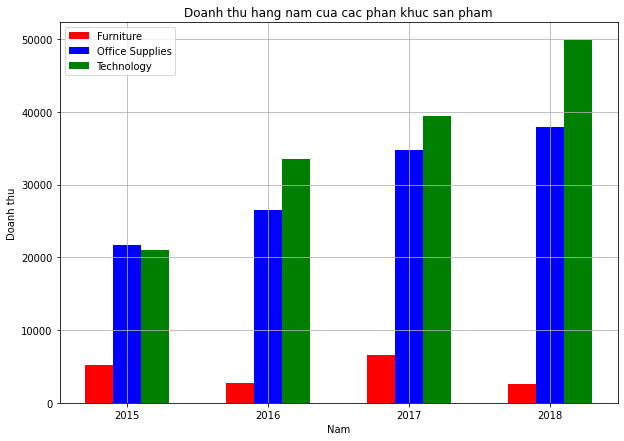

In [6]:
plt.figure(figsize=(10,7))
plt.bar(x=year - 0.2,height=furniture,width=0.2,color='red',label='Furniture')
plt.bar(x=year,height=office_Supplies,width=0.2,color='blue',label='Office Supplies')
plt.bar(x=year + 0.2,height=technology,width=0.2,color='green',label='Technology')
plt.title('Doanh thu hang nam cua cac phan khuc san pham')
plt.ylabel('Doanh thu')
plt.xlabel('Nam')
plt.xticks(year)
plt.grid()
plt.legend()
plt.show()

In [7]:
time=dataframe_1.groupby('Year and Mouth').sum()['Profit']
date = [x for x,y in time.items()]



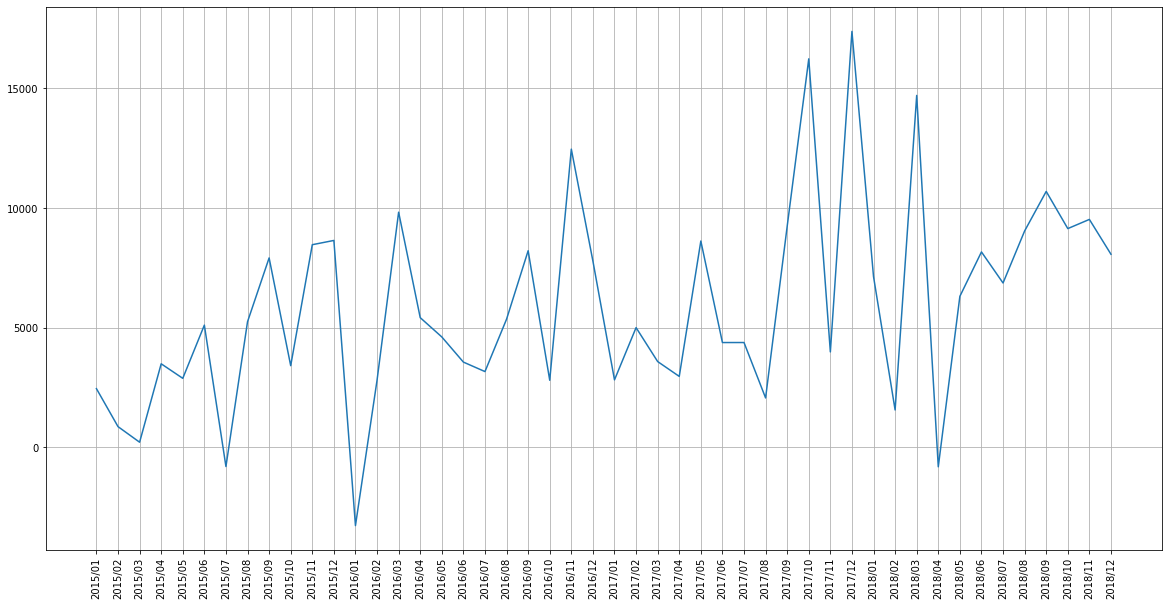

In [8]:
plt.figure(figsize=(20,10))
plt.plot(date,time)
plt.xticks(date,rotation=90)
plt.grid()
plt.show()

In [9]:
city=dataframe_1.groupby(['Year','City'],sort=True).sum().sort_values('Profit',ascending=False)['Profit']
city

Year  City         
2018  New York City    20656.7189
2016  New York City    17013.1952
2018  Seattle          15299.7562
2017  New York City    11673.9506
2018  Los Angeles       9915.9984
                          ...    
      Philadelphia     -4958.5511
      Burlington       -5424.9570
      Chicago          -5497.6861
2015  San Antonio      -6100.8679
2017  Lancaster        -6530.6755
Name: Profit, Length: 1201, dtype: float64

TypeError: unhashable type: 'numpy.ndarray'

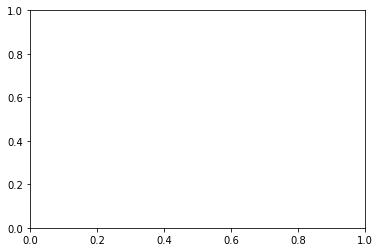

In [10]:

top_city = [x for x,y in city.items()]
plt.bar(x=(top_city ),height= city,color='red',width=0.5)
plt.xticks(top_city,rotation=90)
plt.grid()
plt.show()


In [ ]:
top_city

['New York City',
 'Los Angeles',
 'Seattle',
 'San Francisco',
 'Detroit',
 'Lafayette',
 'Jackson',
 'Atlanta',
 'Minneapolis',
 'San Diego']

In [ ]:
df_order=dataframe_1[dataframe_1['Order ID'].duplicated(keep=False)]
df_order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,random,Year
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,2017
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,2017
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9,2016
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,39,2016
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,14,2015


In [ ]:
group_product= lambda product: ', '.join(product)

In [ ]:
df_order['All Product']=df_order.groupby('Order ID')['Product ID'].transform(group_product)
df_order.head()

C:\Users\MSII\AppData\Local\Temp\ipykernel_380\3999744916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['All Product']=df_order.groupby('Order ID')['Product ID'].transform(group_product)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,random,Year,All Product
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,2017,"FUR-BO-10001798, FUR-CH-10000454"
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,2017,"FUR-BO-10001798, FUR-CH-10000454"
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9,2016,"FUR-TA-10000577, OFF-ST-10000760"
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,39,2016,"FUR-TA-10000577, OFF-ST-10000760"
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,14,2015,"FUR-FU-10001487, OFF-AR-10002833, TEC-PH-10002..."


In [ ]:
df_order=df_order[['Order ID','All Product']].drop_duplicates()
df_order

,Order ID,All Product
0,CA-2017-152156,"FUR-BO-10001798, FUR-CH-10000454"
3,US-2016-108966,"FUR-TA-10000577, OFF-ST-10000760"
5,CA-2015-115812,"FUR-FU-10001487, OFF-AR-10002833, TEC-PH-10002..."
14,US-2016-118983,"OFF-AP-10002311, OFF-BI-10000756"
18,CA-2015-143336,"OFF-AR-10003056, TEC-PH-10001949, OFF-BI-10002215"
...,...,...
9973,US-2017-103674,"TEC-PH-10004080, OFF-AR-10004752, OFF-PA-10000..."
9982,US-2017-157728,"OFF-PA-10002195, TEC-PH-10001305"
9984,CA-2016-100251,"OFF-LA-10003766, OFF-SU-10000898"
9987,CA-2018-163629,"TEC-AC-10001539, TEC-PH-10004006"


In [ ]:
df_order['All Product'].value_counts()

FUR-BO-10001798, FUR-CH-10000454                                                                                         1
OFF-PA-10004983, OFF-AR-10004010, OFF-SU-10002881, FUR-BO-10001608                                                       1
OFF-AR-10000658, TEC-PH-10000347                                                                                         1
OFF-BI-10000285, OFF-PA-10001804                                                                                         1
OFF-BI-10002557, OFF-PA-10002319                                                                                         1
                                                                                                                        ..
OFF-AR-10004648, OFF-LA-10003190                                                                                         1
OFF-AP-10004868, FUR-CH-10004287, OFF-PA-10002689                                                                        1
OFF-AP-10002892,